Autoras: Nicolle Vanessa Saavedra Daza - María Luiza Vieria Reis



In [45]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.metrics import accuracy_score
import cv2 as cv

%matplotlib inline

2.Doy acceso a mi drive

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


3.Cargamos dataset

In [29]:
df = pd.DataFrame()
df = pd.read_csv('/content/gdrive/My Drive/CVS/bill_authentication.csv', encoding='utf-8')

4.Mostramos Datos

In [30]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


5.Analisis de datos

In [31]:
print(f'Cantidad de Filas: {df.shape[0]}')
print(f'Valore Null: {df.isnull().values.any()}')
df.describe()

Cantidad de Filas: 1372
Valore Null: False


,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Conociendo los nombres de las variables

In [32]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

Analizando las variables de forma individual

In [33]:
df.Variance.describe()

count    1372.000000
mean        0.433735
std         2.842763
min        -7.042100
25%        -1.773000
50%         0.496180
75%         2.821475
max         6.824800
Name: Variance, dtype: float64

In [34]:
df.Skewness.describe()

count    1372.000000
mean        1.922353
std         5.869047
min       -13.773100
25%        -1.708200
50%         2.319650
75%         6.814625
max        12.951600
Name: Skewness, dtype: float64

In [20]:
df.Curtosis.describe()

count    1372.000000
mean        1.397627
std         4.310030
min        -5.286100
25%        -1.574975
50%         0.616630
75%         3.179250
max        17.927400
Name: Curtosis, dtype: float64

In [21]:
df.Entropy.describe()

count    1372.000000
mean       -1.191657
std         2.101013
min        -8.548200
25%        -2.413450
50%        -0.586650
75%         0.394810
max         2.449500
Name: Entropy, dtype: float64

In [22]:
df.Class.describe()

count    1372.000000
mean        0.444606
std         0.497103
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Class, dtype: float64

6.Gráficos de dispersión

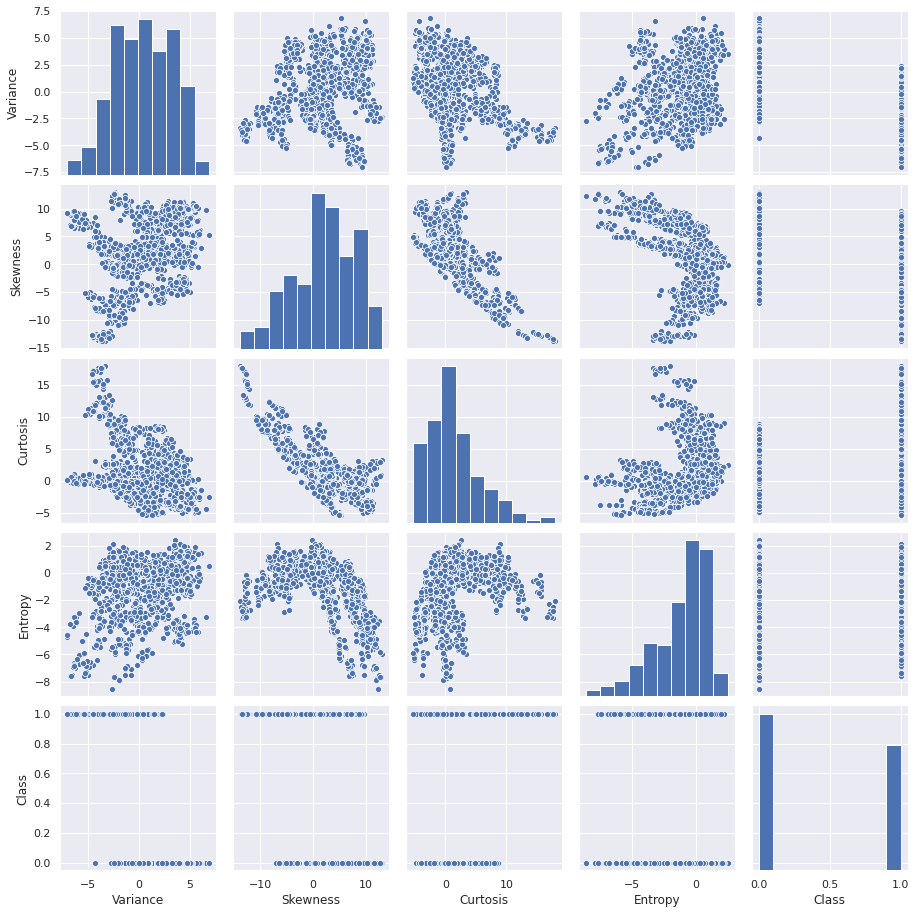

In [35]:
sns.pairplot(df)

7.Graficas de Correlación

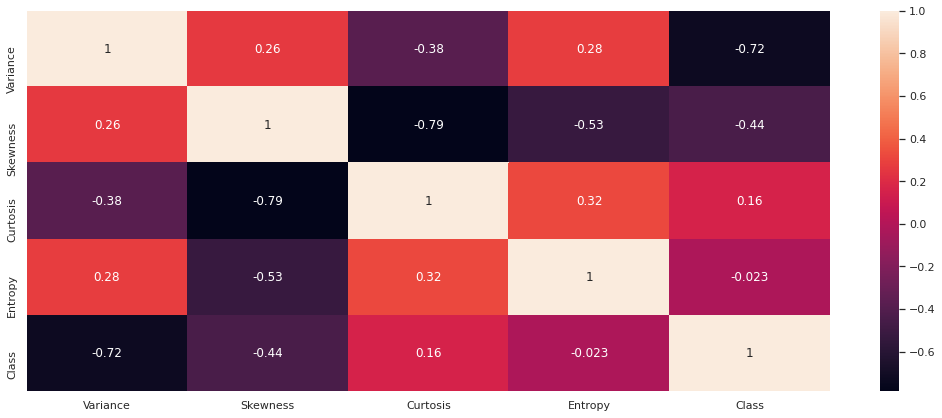

In [36]:
sns.set(rc={'figure.figsize':(18,7)})
sns.heatmap(data=df.corr(), annot=True)

8.Grafica de barras

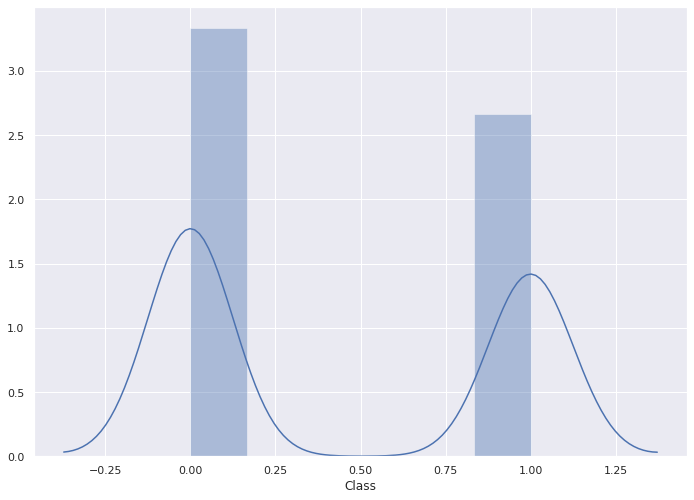

In [37]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Class'])
plt.show()

9.Selección del algoritmo "idóneo"

Opción 1: Regresión lineal


1.   Separación de datos de entrenamiento-prueba
2.   entrenamiento del algoritmo



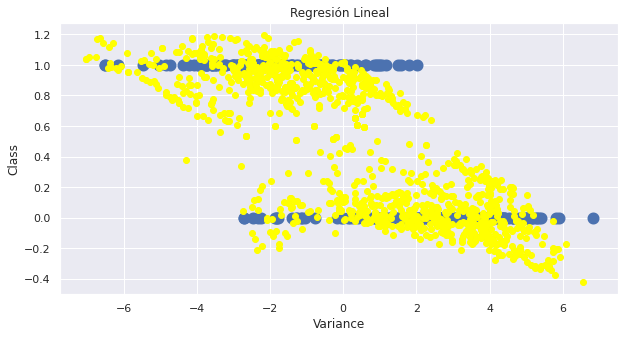

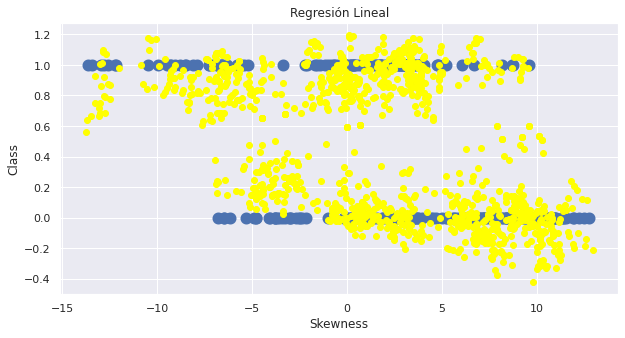

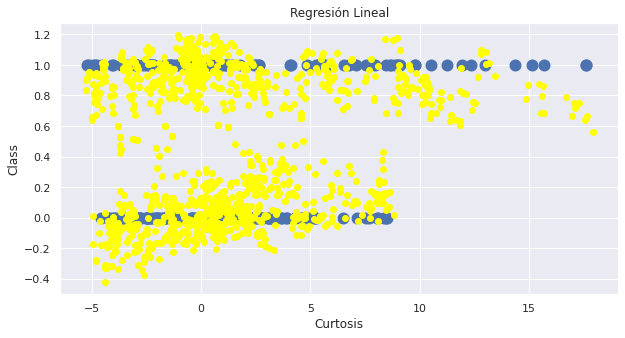

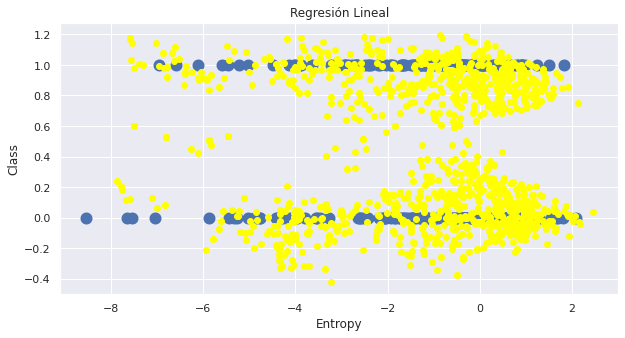


 Presición del modelo
0.8905912095074109


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model  import LogisticRegression
x = df[df.columns[:-1]]
y = df['Class']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.8)
regressor= LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
sns.set(rc={'figure.figsize':(10,5)})
for col in df.columns[:-1]:
  plt.scatter(x_train[col], y_train, linewidth=6)
  plt.scatter(x_test[col], y_pred, color='yellow', linewidth=1)
  plt.title('Regresión Lineal')
  plt.xlabel(col)
  plt.ylabel('Class')
  plt.show()
print('\n Presición del modelo')
print(regressor.score(x_train, y_train))

La precisión o inferencia es de 89%

Opción 2: Arbol de decisión es la mejor 

Separación de datos de entrenamiento-prueba y entrenamiento del algoritmo


In [67]:
Y= df['Class']
X = df.drop('Class', axis=1)
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
arbol = DecisionTreeClassifier(max_depth=5, random_state=0)
arbol.fit(X_train, Y_train)
arbol.predict(X_test.iloc[0:10])

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Vemos la precisión del modelo

In [68]:
accuracy= arbol.score(X_test,Y_test)
print(accuracy)

0.9636363636363636


Definimos las variables y el nombre de la imagen de nuestro grafico

In [60]:
lista_nombres= list(['Variance','Skewness','Curtosis','Entropy'])
dot_data = export_graphviz(arbol, class_names=lista_nombres)
grafico = graph_from_dot_data(dot_data)
grafico.write_png('arbol_iris.png')

True

Precisión del modelo vista desde diferentes puntos

In [59]:
y_train_predi=arbol.predict(X_train)
y_test_predi= arbol.predict(X_test)
#calcular la exactitud
print("Accuracy of train: %"+ str(accuracy_score(y_train_predi,Y_train)))
print("Accuracy of test: %"+ str(accuracy_score(y_test_predi, Y_test)))
#overfitting 
print("Accuracy Global %"+ str(arbol.score(X_test,Y_test)))

Accuracy of train: %0.9945305378304466
Accuracy of test: %0.9781818181818182
Accuracy Global %0.9781818181818182


Importancia de las variables

In [61]:
df_relevant = pd.DataFrame({'caracteristica':X_train.columns,'Importancia':arbol.feature_importances_})
df_relevant= df_relevant.sort_values('Importancia',ascending=False)
df_relevant.head()

,caracteristica,Importancia
0,Variance,0.610475
1,Skewness,0.231721
2,Curtosis,0.144024
3,Entropy,0.013779


Resultados graficos del modelo 

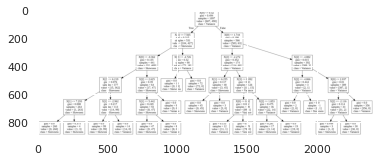

In [62]:
img = cv.imread('/content/arbol_iris.png')
plt.imshow(img)

#Selección del algoritmo "idóneo"

Nuestra algoritmo de regresión líneal daba una precisión de 89%
                     arbol de decisión daba una precisión de 96%
                Así que el más idoneo es  el arbol de decisión 